In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import numpy as np
import os

In [291]:
# SRGAN WITH AFL
sr_g_log = pd.read_csv('runs/G_log_4/2/train_results.csv')
sr_g_log.name = 'sr_g_log'

sr_g_no_log = pd.read_csv('runs/G_no_log_4/2/train_results.csv')
sr_g_no_log.name = 'sr_g_no_log'

sr_l_log = pd.read_csv('runs/L_log_4/2/train_results.csv')
sr_l_log.name = 'sr_l_log'

sr_l_no_log = pd.read_csv('runs/L_no_log_4/8/train_results.csv')
sr_l_no_log.name = 'sr_l_no_log'

# eSRGAN WITH AFL
esr_g_log = pd.read_csv('runs/G_log_4/3/train_results.csv')
esr_g_log.name = 'esr_g_log'

esr_g_no_log = pd.read_csv('runs/G_no_log_4/3/train_results.csv')
esr_g_no_log.name = 'esr_g_no_log'

esr_l_log = pd.read_csv('runs/L_log_4/3/train_results.csv')
esr_l_log.name = 'esr_l_log'

esr_l_no_log = pd.read_csv('runs/L_no_log_4/9/train_results.csv')
esr_l_no_log.name = 'esr_l_no_log'

# SRGAN NO AFL
sr_no_afl = pd.read_csv('runs/no_AFL_4/14/train_results.csv')
sr_no_afl.name = 'sr_no_afl'

# eSRGAN NO AFL
esr_no_afl = pd.read_csv('runs/no_AFL_4/15/train_results.csv')
esr_no_afl.name = 'esr_no_afl'

# Save dfs in list
dfs = [esr_g_log, esr_g_no_log, esr_l_log, esr_l_no_log, esr_no_afl, sr_g_log, sr_g_no_log, sr_l_log, sr_l_no_log,  sr_no_afl]
max_params = ['PSNR', 'SSIM', 'FSIM']
min_params = ['BRISQUE','GMSD', 'MDSI']
all_params = ['PSNR', 'SSIM', 'FSIM', 'BRISQUE','GMSD', 'MDSI']

In [264]:
def plot_list_dfs(dfs, param, ax):
    for df in dfs:
        ax.plot(df[param], label=df.name)
        ax.set_title(param)
    ax.legend()

def compare_2_nets(dfs, params, shape, ax):
    for df in dfs:
        i = 0
        for x in range(shape[0]):
            for y in range(shape[1]):
                ax[x][y].plot(df[params[i]], label=df.name)
                ax[x][y].set_title(params[i])
                i += 1
                ax[x][y].legend()
    plt.tight_layout()
    
def take_best_4(dfs, param, order):
    if order == 'max':
        list2sort = [np.max(df[param]) for df in dfs]
        tmp = sorted(list2sort)[-4:]
        dictionary = dict(zip(list2sort, [df for df in dfs]))
        result = []
        for x in tmp:
            result.append(dictionary[x])
    if order == 'min':
        list2sort = [np.max(df[param]) for df in dfs]
        tmp = sorted(list2sort)[:4]
        dictionary = dict(zip(list2sort, [df for df in dfs]))
        result = []
        for x in tmp:
            result.append(dictionary[x])
    return result

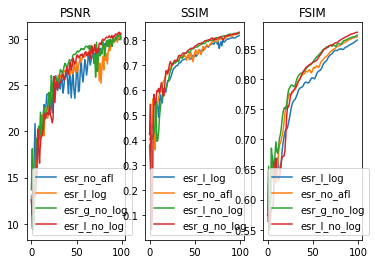

In [265]:
fig, ax = plt.subplots(1,len(max_params))
plot_dict = dict(zip(max_params, range(len(max_params))))
for param in max_params:
    best_4 = take_best_4(dfs,param, 'max')
    plot_list_dfs(best_4, param, ax[plot_dict[param]])
plt.show()

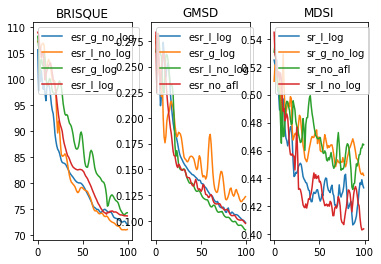

In [266]:
fig, ax = plt.subplots(1,len(min_params))
plot_dict = dict(zip(min_params, range(len(min_params))))
for param in min_params:
    best_4 = take_best_4(dfs,param, 'min')
    plot_list_dfs(best_4, param, ax[plot_dict[param]])
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

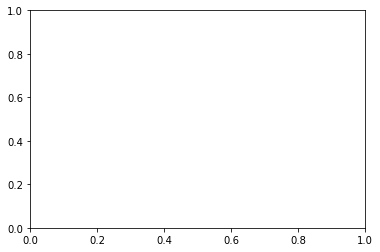

<Figure size 1800x1440 with 0 Axes>

In [268]:
# fig, ax = plt.subplots(1,1)
# plot_list_dfs([esr_no_afl, sr_no_afl], 'PSNR', ax)
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(25,20))
compare_2_nets([esr_no_afl, sr_no_afl], 'PSNR', (1,1), ax)

AttributeError: 'Line2D' object has no property 'sublot'

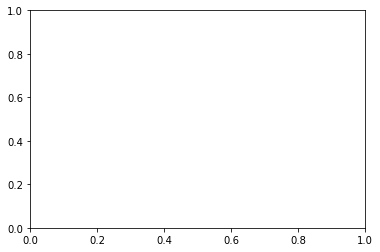

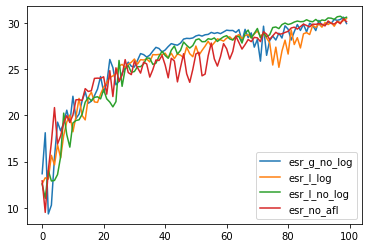

In [189]:
plot_list_dfs(max_psnr, 'PSNR')

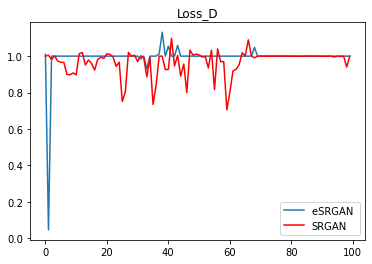

<Figure size 1800x1440 with 0 Axes>

In [286]:
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(25,20))
ax.set_title('Loss_D')
ax.plot(esr_no_afl['Loss_D'], label='eSRGAN ')
ax.plot(sr_no_afl['Loss_D'], 'r', label='SRGAN')
ax.legend()

# ax[1].set_title('SSIM')
# ax[1].plot(sr_g_log['SSIM'], label='eSRGAN')
# ax[1].plot(esr_g_log['SSIM'], 'r', label='SRGAN')
# ax[1].legend()

plt.show()


In [296]:
param = 'MDSI'
for df in dfs:
    print(df.name, np.min(df[param]))

esr_g_log 0.3758292509750886
esr_g_no_log 0.3694483579108209
esr_l_log 0.3735438269196135
esr_l_no_log 0.36570917476307263
esr_no_afl 0.3711749328808351
sr_g_log 0.4151356003501199
sr_g_no_log 0.44223750947099744
sr_l_log 0.4067971742514408
sr_l_no_log 0.40319197512034216
sr_no_afl 0.4321577747662862


In [125]:
df_new.head()

,Epoch,Loss_D,Loss_G,Score_D,Score_G,PSNR,SSIM,FSIM,BRISQUE,GMSD,MDSI
0,1,0.965584,0.068690,0.526991,0.492575,16.614849,0.455772,0.564608,109.620300,0.277579,0.546220
1,2,0.141846,0.084756,0.879475,0.021321,9.507417,0.142750,0.528418,106.212341,0.287057,0.574000
2,3,1.000000,0.093773,1.000000,1.000000,13.720828,0.423639,0.561691,109.497498,0.278650,0.549426
3,4,1.000000,0.103756,1.000000,1.000000,16.023621,0.473121,0.537568,111.846375,0.290684,0.573443
4,5,1.000000,0.078377,1.000000,1.000000,15.064398,0.471439,0.547995,104.955750,0.286088,0.564955


In [144]:
import os
import skimage.io

In [148]:
for f in os.listdir('data/Dataset_BUSI_with_GT/test'):
    img = skimage.io.imread(os.path.join('data/Dataset_BUSI_with_GT/test', f))
    if img.shape[0]<256 or img.shape[1]<256:
        print(f, img.shape)

In [190]:
l = [5,6,1,2,9,0,12,1]

In [191]:
tmp = sorted(l)

In [192]:
tmp

[0, 1, 1, 2, 5, 6, 9, 12]

In [194]:
tmp[-4:]

[5, 6, 9, 12]

In [204]:
l

[5, 6, 1, 2, 9, 0, 12, 1]

<AxesSubplot:>

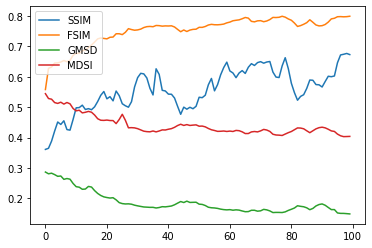

In [222]:
sr_l_no_log.drop(['Epoch', 'Loss_D', 'Loss_G', 'Score_D', 'Score_G', 'BRISQUE', 'PSNR'], axis=1).plot()

In [288]:
from PIL import Image
im = Image.open('data/test_data/normal (117).png')
width, height = im.size   # Get dimensions
new_width, new_height = 256, 256
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
im = im.crop((left, top, right, bottom))

In [289]:
im.save(f'test.jpg')

In [297]:
import bson
a = bson.dumps({"A":[1,2,3,4,5,"6", u"7", {"C":u"DS"}]})
b = bson.loads(a)
b

ModuleNotFoundError: No module named 'bson'